In [1]:
import sys
import sys
sys.path
sys.path.append('../')
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import numpy as np
from diamonds import experiments, normal_equation, customSGD


/root/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Discution 1
  - The Second round was used to find best parameters to train the algorithm, since there was no consistency difference between the 3 top configurations, also with the higher number of executions. 
  - We opted here to use the 3 best configurations in 5k iterations.  


In [2]:
X = experiments.load_train_data()
_, (X_train, X_test, y_train, y_test) = experiments.gen_splits(X, scale=True)

## Custom Predictor with the same SKLearn  SGDRegressor Parameters

In [3]:
base_params = {'lr':0.1,
'max_iter':1000,
'batch_sz':50,
'lr_optimizer':'invscaling',
'print_interval':100}

In [4]:
theta = customSGD.SGD(**base_params, 
                      batch_type='Mini',
                      X=X_train, y=np.log(y_train), 
                      )
y_pred = np.exp(customSGD.predict(theta, X_test))

Number of samples: 16864
Number of parameters: 13
It: 1 Batch: 1 Epoch 0 Error: 24.99827951 lr: 0.10000000 
It: 100 Batch: 100 Epoch 0 Error: 0.18157222 lr: 0.03162278 
It: 200 Batch: 200 Epoch 0 Error: 0.05369120 lr: 0.02659148 
It: 300 Batch: 300 Epoch 0 Error: 0.03230543 lr: 0.02402811 
It: 400 Batch: 62 Epoch 1 Error: 0.04889141 lr: 0.02236068 
It: 500 Batch: 162 Epoch 1 Error: 0.04773781 lr: 0.02114743 
It: 600 Batch: 262 Epoch 1 Error: 0.03342773 lr: 0.02020516 
It: 700 Batch: 24 Epoch 2 Error: 0.03668546 lr: 0.01944131 
It: 800 Batch: 124 Epoch 2 Error: 0.02346926 lr: 0.01880302 
It: 900 Batch: 224 Epoch 2 Error: 0.02741475 lr: 0.01825742 
It: 1000 Batch: 324 Epoch 2 Error: 0.02490289 lr: 0.01778279 
Finished 
 It: 1000 Batch: 324 Epoch 2 Error: 0.02490289 lr: 0.01778279 


In [5]:
mini_batch = customSGD.get_iteration_log()
mini_batch.head()

,it,b_it,epoch,error,eta
0,1,1,0,24.998280,0.100000
1,2,2,0,18.706582,0.084090
2,3,3,0,15.503219,0.075984
3,4,4,0,13.202197,0.070711
4,5,5,0,12.079337,0.066874


In [6]:
theta = customSGD.SGD(**base_params, 
                      batch_type='Stochastic',
                      X=X_train, y=np.log(y_train), 
                      )
y_pred = np.exp(customSGD.predict(theta, X_test))

Number of samples: 16864
Number of parameters: 13
Shuffled
It: 1 Batch: 1 Epoch 0 Error: 24.13396681 lr: 0.10000000 
It: 100 Batch: 100 Epoch 0 Error: 0.16715185 lr: 0.03162278 
It: 200 Batch: 200 Epoch 0 Error: 0.03898821 lr: 0.02659148 
It: 300 Batch: 300 Epoch 0 Error: 0.03012813 lr: 0.02402811 
It: 400 Batch: 62 Epoch 1 Error: 0.03105022 lr: 0.02236068 
It: 500 Batch: 162 Epoch 1 Error: 0.02995508 lr: 0.02114743 
It: 600 Batch: 262 Epoch 1 Error: 0.03843226 lr: 0.02020516 
It: 700 Batch: 24 Epoch 2 Error: 0.02849064 lr: 0.01944131 
It: 800 Batch: 124 Epoch 2 Error: 0.02039071 lr: 0.01880302 
It: 900 Batch: 224 Epoch 2 Error: 0.03167815 lr: 0.01825742 
It: 1000 Batch: 324 Epoch 2 Error: 0.02919228 lr: 0.01778279 
Finished 
 It: 1000 Batch: 324 Epoch 2 Error: 0.02919228 lr: 0.01778279 


In [7]:
stoch_batch = customSGD.get_iteration_log()
stoch_batch.head()

,it,b_it,epoch,error,eta
0,1,1,0,24.133967,0.100000
1,2,2,0,18.590457,0.084090
2,3,3,0,16.185564,0.075984
3,4,4,0,14.326551,0.070711
4,5,5,0,11.369942,0.066874


In [8]:
base_params = {'lr':0.1,
'max_iter':1000,
'batch_sz':1,
'lr_optimizer':'invscaling',
'print_interval':100}

In [9]:
theta = customSGD.SGD(**base_params, 
                      batch_type='Single',
                      epsilon=.000000000001,
                      X=X_train, y=np.log(y_train), 
                      )
y_pred = np.exp(customSGD.predict(theta, X_test))

Number of samples: 16864
Number of parameters: 13
It: 1 Batch: 1 Epoch 0 Error: 12.48941038 lr: 0.10000000 
It: 100 Batch: 100 Epoch 0 Error: 0.25557524 lr: 0.03162278 
It: 200 Batch: 200 Epoch 0 Error: 0.00527541 lr: 0.02659148 
It: 300 Batch: 300 Epoch 0 Error: 0.00673183 lr: 0.02402811 
It: 400 Batch: 400 Epoch 0 Error: 0.00018524 lr: 0.02236068 
It: 500 Batch: 500 Epoch 0 Error: 0.00001751 lr: 0.02114743 
It: 600 Batch: 600 Epoch 0 Error: 0.03353260 lr: 0.02020516 
It: 700 Batch: 700 Epoch 0 Error: 0.00195765 lr: 0.01944131 
It: 800 Batch: 800 Epoch 0 Error: 0.00004396 lr: 0.01880302 
It: 900 Batch: 900 Epoch 0 Error: 0.00064274 lr: 0.01825742 
It: 1000 Batch: 1000 Epoch 0 Error: 0.03693424 lr: 0.01778279 
Finished 
 It: 1000 Batch: 1000 Epoch 0 Error: 0.03693424 lr: 0.01778279 


In [10]:
single_inst = customSGD.get_iteration_log()
single_inst.head()

,it,b_it,epoch,error,eta
0,1,1,0,12.489410,0.100000
1,2,2,0,14.764419,0.084090
2,3,3,0,3.188158,0.075984
3,4,4,0,5.286223,0.070711
4,5,5,0,0.164882,0.066874


In [11]:
theta = customSGD.SGD(**base_params, 
                      batch_type='Full',
                      X=X_train, y=np.log(y_train), 
                      )
y_pred = np.exp(customSGD.predict(theta, X_test))

Number of samples: 16864
Number of parameters: 13
It: 1 Batch: 1 Epoch 0 Error: 24.17583616 lr: 0.10000000 
It: 100 Batch: 1 Epoch 99 Error: 0.14935115 lr: 0.03162278 
It: 200 Batch: 1 Epoch 199 Error: 0.05263419 lr: 0.02659148 
It: 300 Batch: 1 Epoch 299 Error: 0.04009683 lr: 0.02402811 
It: 400 Batch: 1 Epoch 399 Error: 0.03616014 lr: 0.02236068 
It: 500 Batch: 1 Epoch 499 Error: 0.03388362 lr: 0.02114743 
It: 600 Batch: 1 Epoch 599 Error: 0.03214098 lr: 0.02020516 
It: 700 Batch: 1 Epoch 699 Error: 0.03065891 lr: 0.01944131 
It: 800 Batch: 1 Epoch 799 Error: 0.02934415 lr: 0.01880302 
It: 900 Batch: 1 Epoch 899 Error: 0.02815452 lr: 0.01825742 
It: 1000 Batch: 1 Epoch 999 Error: 0.02706638 lr: 0.01778279 
Finished 
 It: 1000 Batch: 1 Epoch 999 Error: 0.02706638 lr: 0.01778279 


In [12]:
full_batch = customSGD.get_iteration_log()
full_batch.head()

,it,b_it,epoch,error,eta
0,1,1,0,24.175836,0.100000
1,2,1,1,19.549439,0.084090
2,3,1,2,16.259407,0.075984
3,4,1,3,13.779518,0.070711
4,5,1,4,11.842491,0.066874


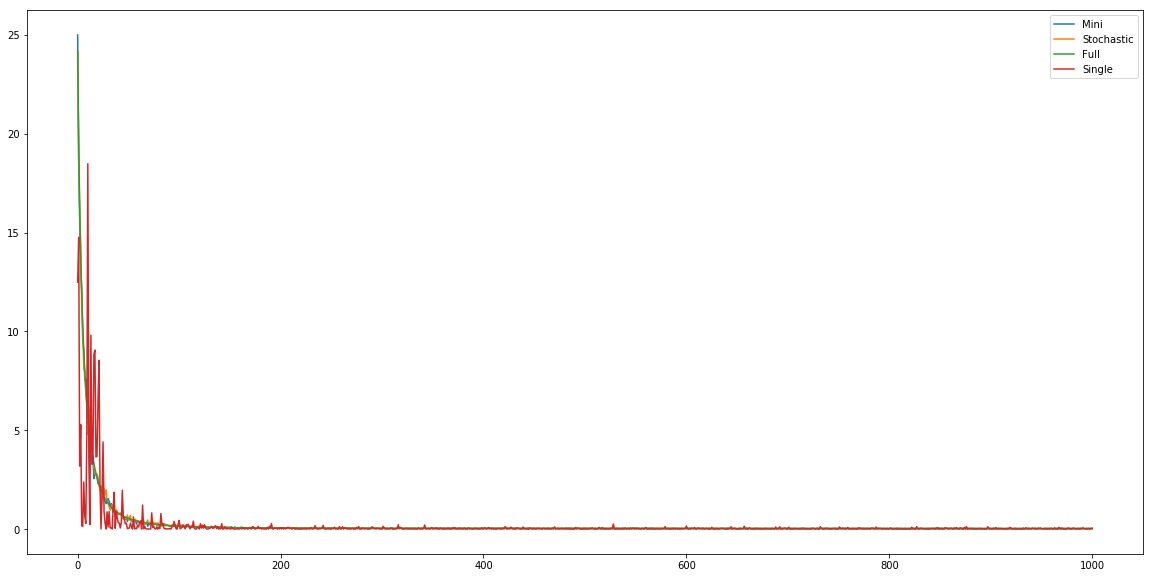

In [13]:
plt.figure(figsize=(20,10))
mini_batch.error.plot(label='Mini')
stoch_batch.error.plot(label='Stochastic')
full_batch.error.plot(label='Full')
single_inst.error.plot(label='Single')
plt.legend()

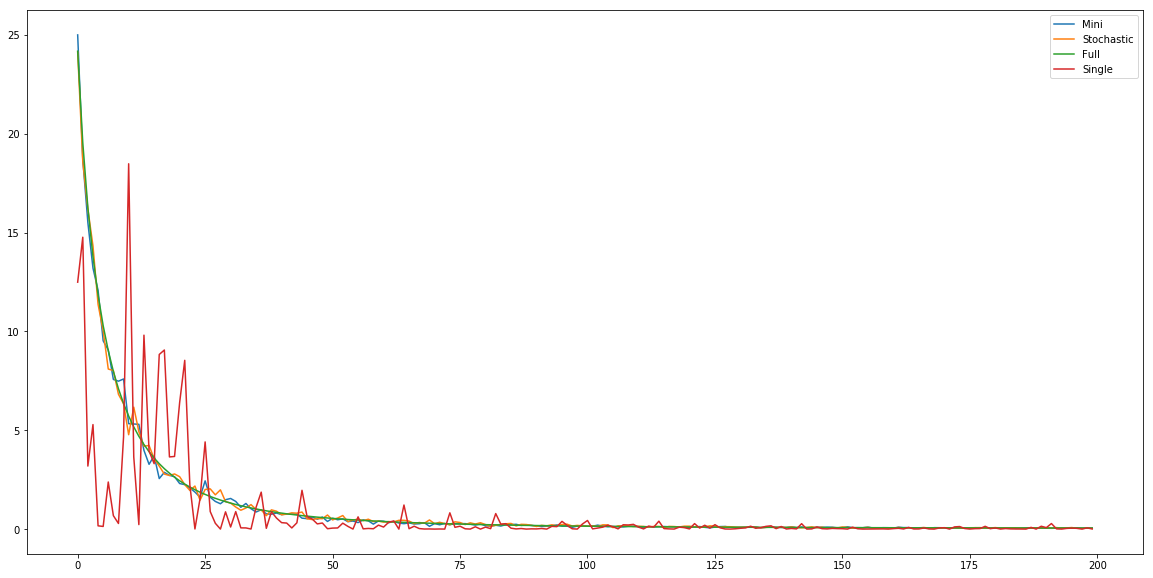

In [14]:
plt.figure(figsize=(20,10))
mini_batch.head(200).error.plot(label='Mini')
stoch_batch.head(200).error.plot(label='Stochastic')
full_batch.head(200).error.plot(label='Full')
single_inst.head(200).error.plot(label='Single')
plt.legend()

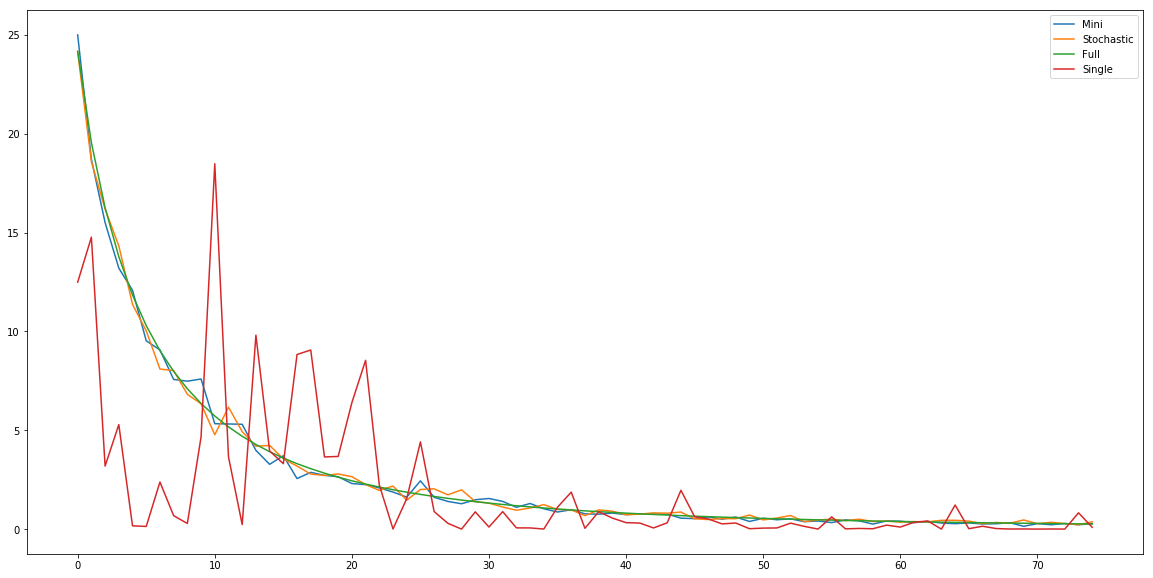

In [15]:
plt.figure(figsize=(20,10))
mini_batch.head(75).error.plot(label='Mini')
stoch_batch.head(75).error.plot(label='Stochastic')
full_batch.head(75).error.plot(label='Full')
single_inst.head(75).error.plot(label='Single')
plt.legend()